# 1. Time Series Analysis

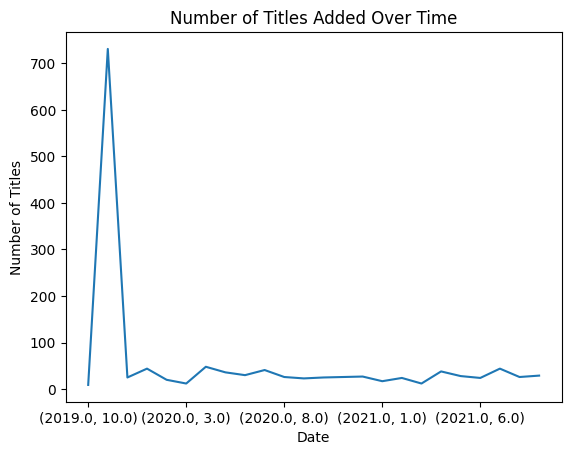

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/disney_plus_titles.csv"  # Replace with the actual file path

disney_data = pd.read_csv(file_path)

# Convert 'date_added' to datetime format and extract year and month
disney_data['date_added'] = pd.to_datetime(disney_data['date_added'], errors='coerce')
disney_data['year_added'] = disney_data['date_added'].dt.year
disney_data['month_added'] = disney_data['date_added'].dt.month

# Count the number of titles added per month
monthly_additions = disney_data.groupby(['year_added', 'month_added']).size()

# Plot the time series
monthly_additions.plot(title='Number of Titles Added Over Time', xlabel='Date', ylabel='Number of Titles')
plt.show()


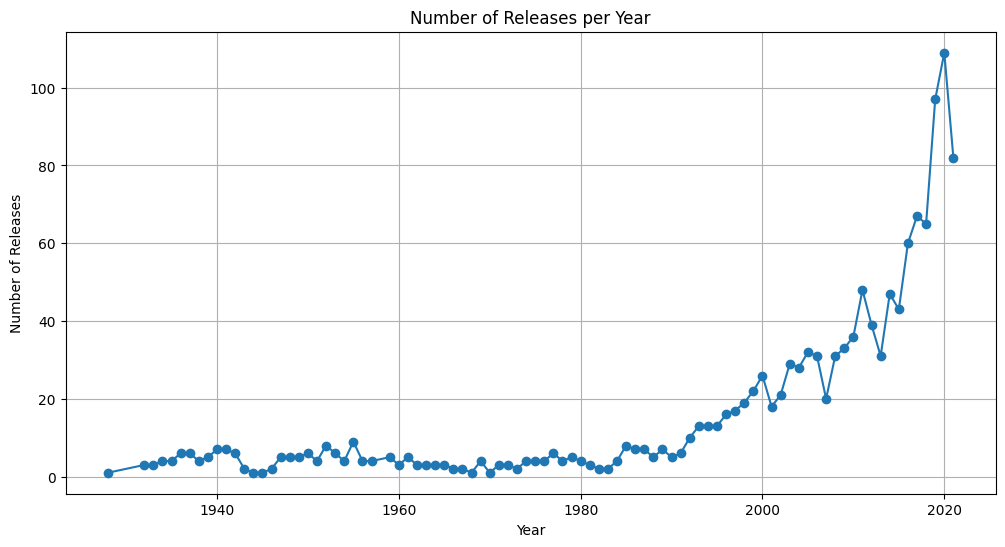

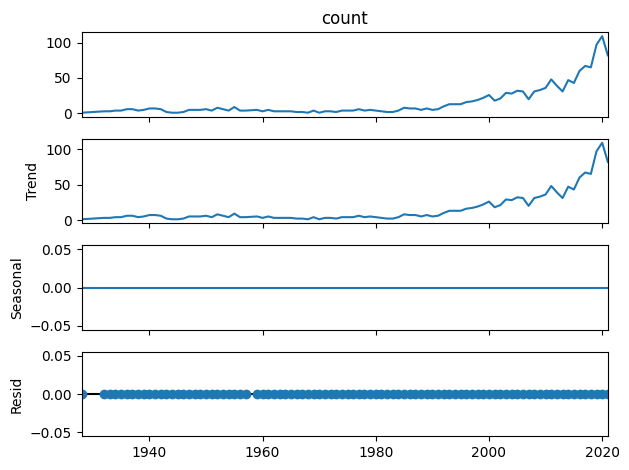

In [9]:
# Analyzing the release trends over the years
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
release_year_counts = df['release_year'].dt.year.value_counts().sort_index()

# Plotting the release trends
plt.figure(figsize=(12, 6))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o')
plt.title('Number of Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

# Decompose time series data (if applicable)
decomposed = seasonal_decompose(release_year_counts, model='additive', period=1)
decomposed.plot()
plt.show()


# 2. Sentiment Analysis or Text Mining

                            title  sentiment
0                   A Spark Story      0.000
1                  Spooky Buddies      0.000
2          The Fault in Our Stars      0.650
3                 Dog: Impossible      0.375
4  Spidey And His Amazing Friends      0.000


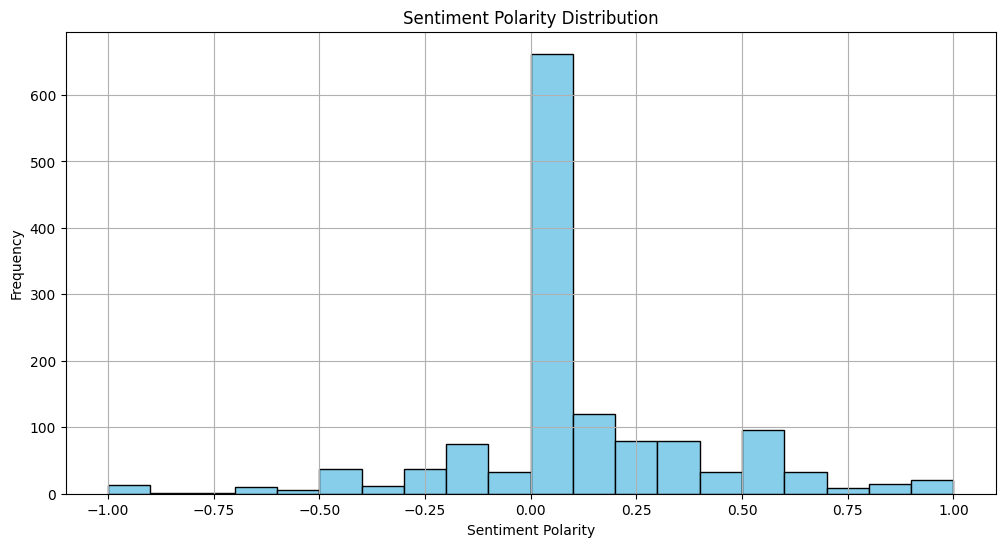

In [8]:

# ## 2. Sentiment Analysis on Descriptions



def get_sentiment(description):
    analysis = TextBlob(description)
    return analysis.sentiment.polarity

df['sentiment'] = df['description'].apply(get_sentiment)

# Display sentiment analysis results
print(df[['title', 'sentiment']].head())

# Plot sentiment distribution
plt.figure(figsize=(12, 6))
plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Extract the 'description' column and fill missing values
descriptions = disney_data['description'].fillna('')

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(descriptions)

# Use NMF to identify topics
nmf = NMF(n_components=10, random_state=42)
nmf.fit(tfidf_matrix)

# Display the top words in each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))


Topic #0:
details advisory donald mickey pluto goofy duck dale chip nephews
Topic #1:
family adventure home green farm mysterious big head country helps
Topic #2:
disney classic walt animation tale magical look music weddings stories
Topic #3:
new girl york city finds moves land country town teen
Topic #4:
high school musical east wildcats series production time middle girl
Topic #5:
team man join heroes marvel forces iron captain protect america
Topic #6:
friends best adventures pooh travel evil discover mickey wood acre
Topic #7:
life year old boy story discovers young dog day true
Topic #8:
world save race time set christmas earth famous journey greatest
Topic #9:
star wars iconic saga animated fly unlikely series stories meet


# 3. Clustering or Classification Techniques

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

# Process the 'listed_in' column (genres)
genres = disney_data['listed_in'].fillna('').apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(genres)

# Combine genre and description features for clustering
combined_matrix = np.hstack([tfidf_matrix.toarray(), genre_matrix])

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(combined_matrix)

# Add cluster labels to the original dataframe
disney_data['cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
print(disney_data[['title', 'listed_in', 'cluster']].head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                            title                             listed_in  \
0                   A Spark Story                           Documentary   
1                  Spooky Buddies                 Comedy, Fantasy, Kids   
2          The Fault in Our Stars         Coming of Age, Drama, Romance   
3                 Dog: Impossible  Animals & Nature, Docuseries, Family   
4  Spidey And His Amazing Friends     Action-Adventure, Animation, Kids   

   cluster  
0        3  
1        2  
2        2  
3        3  
4        1  


                            title  cluster
0                   A Spark Story        0
1                  Spooky Buddies        0
2          The Fault in Our Stars        0
3                 Dog: Impossible        0
4  Spidey And His Amazing Friends        0


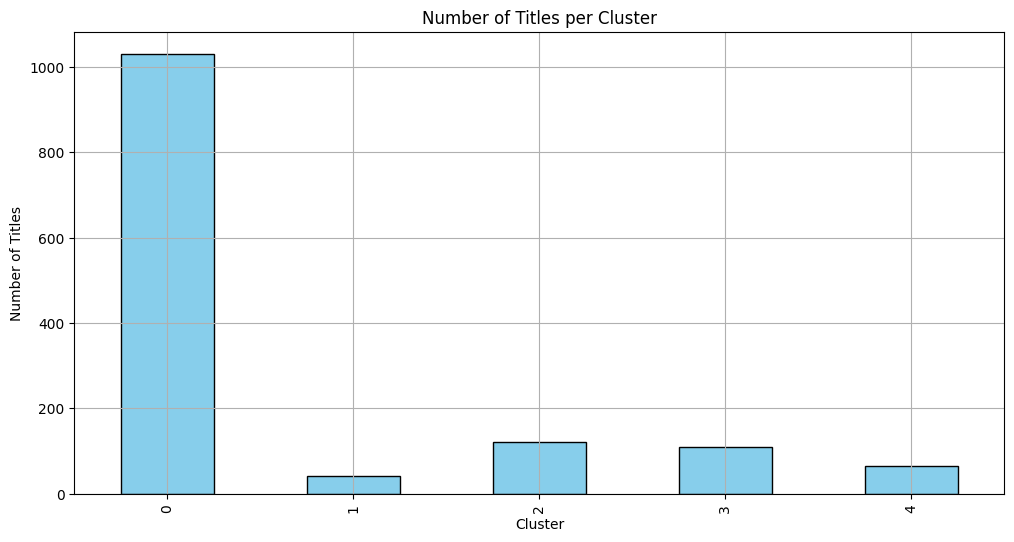

In [10]:
# ## 3. Clustering using KMeans on descriptions (text data)

# In[5]:


# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['description'].dropna())

# Perform KMeans clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(tfidf_matrix)

# Add cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

# Display clustering results
print(df[['title', 'cluster']].head())

# Plot the number of titles in each cluster
plt.figure(figsize=(12, 6))
df['cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Titles per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()